In [1]:
import pandas as pd
import numpy as np
from functools import reduce
import missingno as msno

In [2]:
# These are the datasets uploaded by Jacob to blob storage:
df_app = pd.read_parquet('../do_not_commit/Datasets/AppErrorEvents.parquet')
df_win = pd.read_parquet('../do_not_commit/Datasets/WindowsErrorEvents.parquet')
df_hang = pd.read_parquet('../do_not_commit/Datasets/AppHangEvents.parquet')
df_boot = pd.read_parquet('../do_not_commit/Datasets/BootEvents.parquet')


Do this in one or two ways:
1. Add use suffixes= in pd.merge() to explicitly assign each column/variable to its original error type.
2. Combine values for common columns into the same column, add a new column for each of the 4 for its error type, e.g. "Hang", and not assign column suffixes (use pd.concat([dataframes])).

Given from the original XML exercise columns with the same name in different sets represented the same variable, preferred approach is #2.


In [3]:
df_app['error_type'] = "Application"
df_app.columns

Index(['RWB_EVENTRAWRESULTITEM_ID', 'RWB_ETL_EVENT_DESTINATION_IDENTIFIER',
       'RWB_CREATE_TIMESTAMP', 'RWB_EFFECTIVE_DATE', 'ID', 'ClientItemKey',
       'LogName', 'ProviderName', 'ProviderGUID', 'EventID',
       'EventIDQualifiers', 'Version', 'Level', 'Task', 'Opcode', 'Keywords',
       'TimeCreatedSystemTime', 'EventRecordID', 'ActivityID',
       'RelatedActivityID', 'Channel', 'UserSID', 'SchemaVersion',
       'dict_EventData_x', 'dict_EventData_y', 'FaultingApplicationName',
       'AppVersion', 'AppTimestamp', 'FaultingModuleName', 'ModuleVersion',
       'ModuleTimestamp', 'ExceptionCode', 'FaultOffset', 'FaultingProcessId',
       'FaultingApplicationStartTime', 'ReportId', 'FaultingPackageFullName',
       'FaultingPackageRelativeApplicationID', 'ProductVersion', 'ProductName',
       'Publisher', 'ProgramId', 'FileId', 'FileVersion', 'error_type'],
      dtype='object')

In [4]:
df_win['error_type'] = 'Windows'
df_win.columns

Index(['RWB_EVENTRAWRESULTITEM_ID', 'RWB_ETL_EVENT_DESTINATION_IDENTIFIER',
       'RWB_CREATE_TIMESTAMP', 'RWB_EFFECTIVE_DATE', 'ID', 'ClientItemKey',
       'LogName', 'ProviderName', 'ProviderGUID', 'EventID',
       'EventIDQualifiers', 'Version', 'Level', 'Task', 'Opcode', 'Keywords',
       'TimeCreatedSystemTime', 'EventRecordID', 'ActivityID',
       'RelatedActivityID', 'Channel', 'UserSID', 'SchemaVersion',
       'dict_EventData_x', 'dict_EventData_y', 'Data_1', 'FaultBucketType',
       'EventName', 'Response', 'CabID', 'ProblemSignatureP1_Application',
       'ProblemSignatureP2_AppVersion', 'ProblemSignatureP3',
       'ProblemSignatureP4_Module', 'ProblemSignatureP5_ModuleVersion',
       'ProblemSignatureP6', 'ProblemSignatureP7_ExceptionCode',
       'ProblemSignatureP8', 'ProblemSignatureP9', 'ProblemSignatureP10',
       'AnalysisSymbol', 'RecheckingForSolution', 'ReportID', 'HashedBucket',
       'CabGuid', 'error_type'],
      dtype='object')

In [5]:
df_hang['error_type'] = 'Hang'
df_hang.columns

Index(['RWB_EVENTRAWRESULTITEM_ID', 'RWB_ETL_EVENT_DESTINATION_IDENTIFIER',
       'RWB_CREATE_TIMESTAMP', 'RWB_EFFECTIVE_DATE', 'ID', 'ClientItemKey',
       'LogName', 'ProviderName', 'ProviderGUID', 'EventID',
       'EventIDQualifiers', 'Version', 'Level', 'Task', 'Opcode', 'Keywords',
       'TimeCreatedSystemTime', 'EventRecordID', 'ActivityID',
       'RelatedActivityID', 'Channel', 'UserSID', 'SchemaVersion',
       'dict_EventData_x', 'dict_EventData_y', 'Program', 'ProgramVersion',
       'ProcessID', 'StartTime', 'TerminationType', 'ReportID',
       'FaultingPackageFullName', 'FaultingPackageRelativeApplicationID',
       'HangType', 'BinaryValue', 'ProductVersion', 'ProductName', 'Publisher',
       'ProgramId', 'FileId', 'FileVersion', 'error_type'],
      dtype='object')

In [6]:
df_boot['error_type'] = 'Boot'
df_boot.columns

Index(['RWB_EVENTBOOTRESULT_ID', 'RWB_ETL_EVENT_DESTINATION_IDENTIFIER',
       'RWB_CREATE_TIMESTAMP', 'RWB_EFFECTIVE_DATE', 'ID', 'EventListID',
       'ClientItemKey', 'GeneratedTime', 'UpdateDurationInMilliseconds',
       'GPDurationInMilliseconds', 'CoreBootDurationInMilliseconds',
       'TotalBootDurationInMilliseconds', 'BootId',
       'BiosDurationInMilliseconds', 'BootDiskMediaType', 'OSVersion',
       'BootReason', 'SchemaVersion', 'SystemPowerOffTime', 'MachineName',
       'AppVersion', 'Reason', 'ExceptionCode', 'param5', 'ActionDescription',
       'ProductVersion', 'ProductName', 'Publisher', 'ProgramId', 'FileId',
       'FileVersion', 'ReportId', 'error_type'],
      dtype='object')

In [7]:
print(len(df_app))
print(len(df_win))
print(len(df_hang))
print(len(df_boot))

268149
9836
40811
1593485


In [8]:
df = pd.concat([df_app, df_win, df_hang, df_boot])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1912281 entries, 4740 to 4357
Data columns (total 89 columns):
 #   Column                                Dtype         
---  ------                                -----         
 0   RWB_EVENTRAWRESULTITEM_ID             float64       
 1   RWB_ETL_EVENT_DESTINATION_IDENTIFIER  int64         
 2   RWB_CREATE_TIMESTAMP                  object        
 3   RWB_EFFECTIVE_DATE                    object        
 4   ID                                    int64         
 5   ClientItemKey                         int64         
 6   LogName                               object        
 7   ProviderName                          object        
 8   ProviderGUID                          object        
 9   EventID                               float64       
 10  EventIDQualifiers                     float64       
 11  Version                               object        
 12  Level                                 float64       
 13  Task        

<AxesSubplot:>

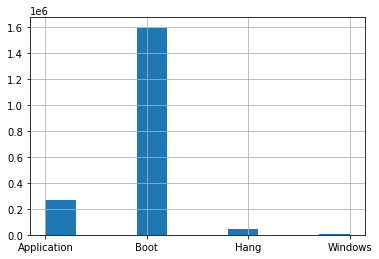

In [9]:
df.sort_values(by=['error_type'])['error_type'].hist()

In [10]:
len(df[df['error_type'] == 'Boot'])

1593485

<AxesSubplot:>

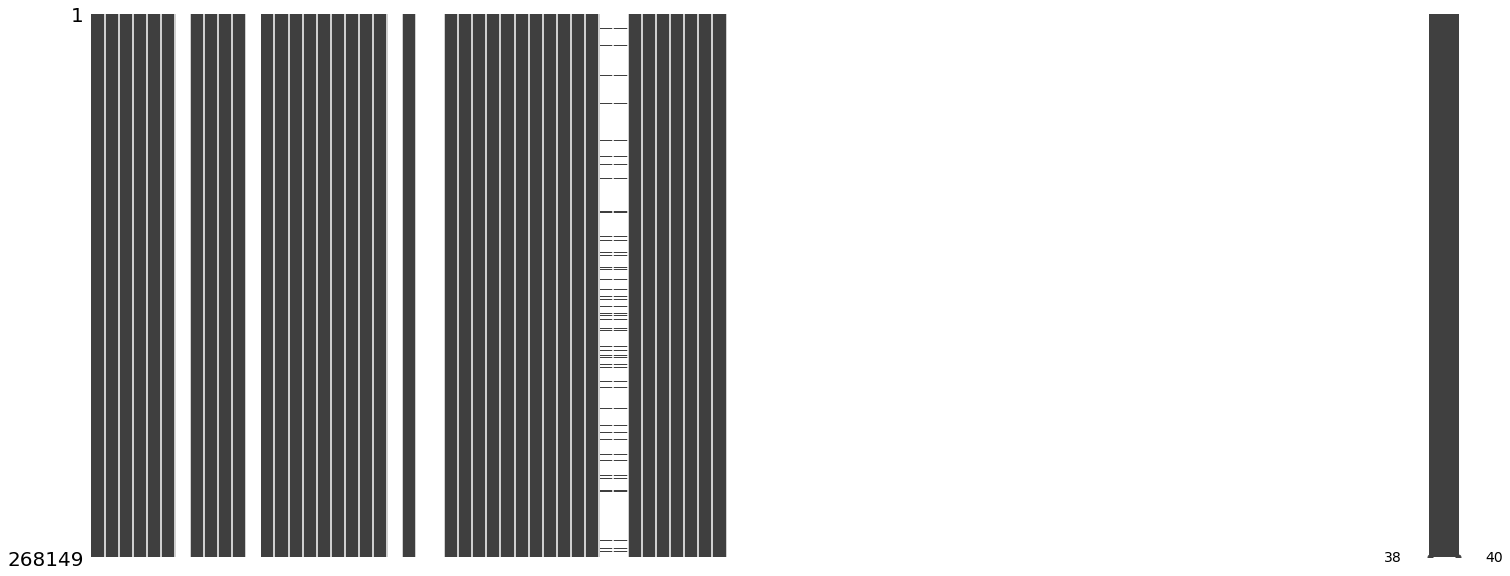

In [11]:
msno.matrix(df[df['error_type'] == 'Application'])

<AxesSubplot:>

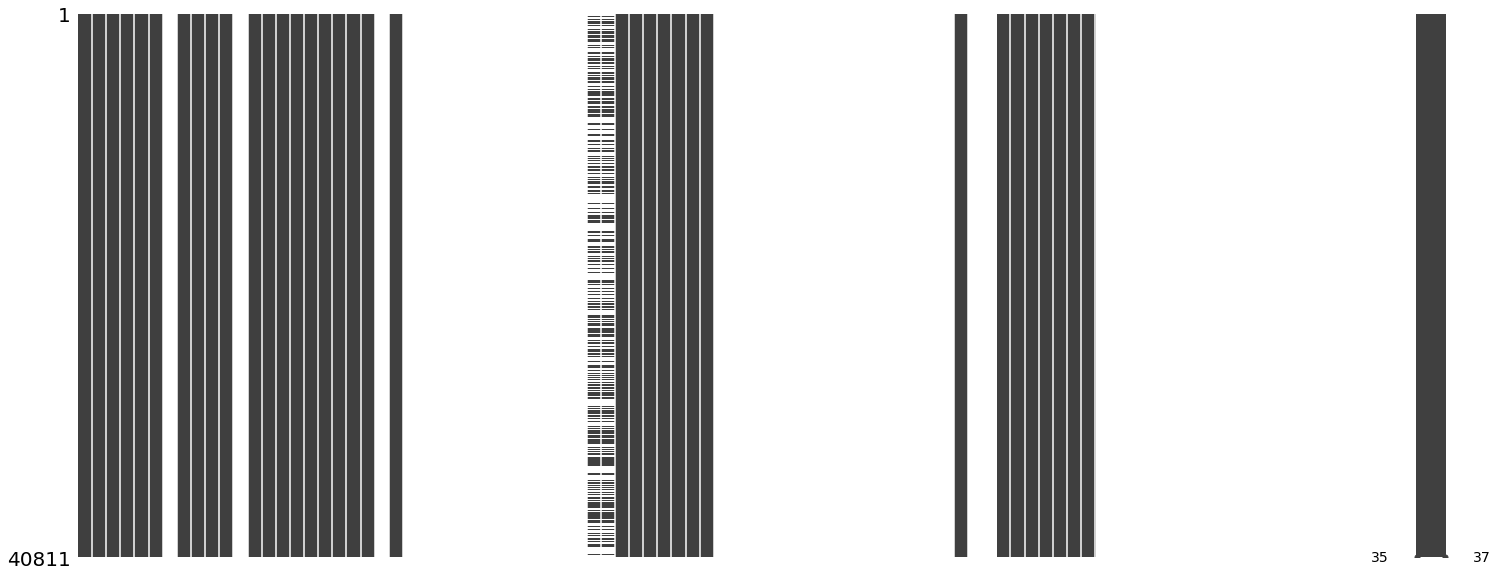

In [12]:
msno.matrix(df[df['error_type'] == 'Hang'])

<AxesSubplot:>

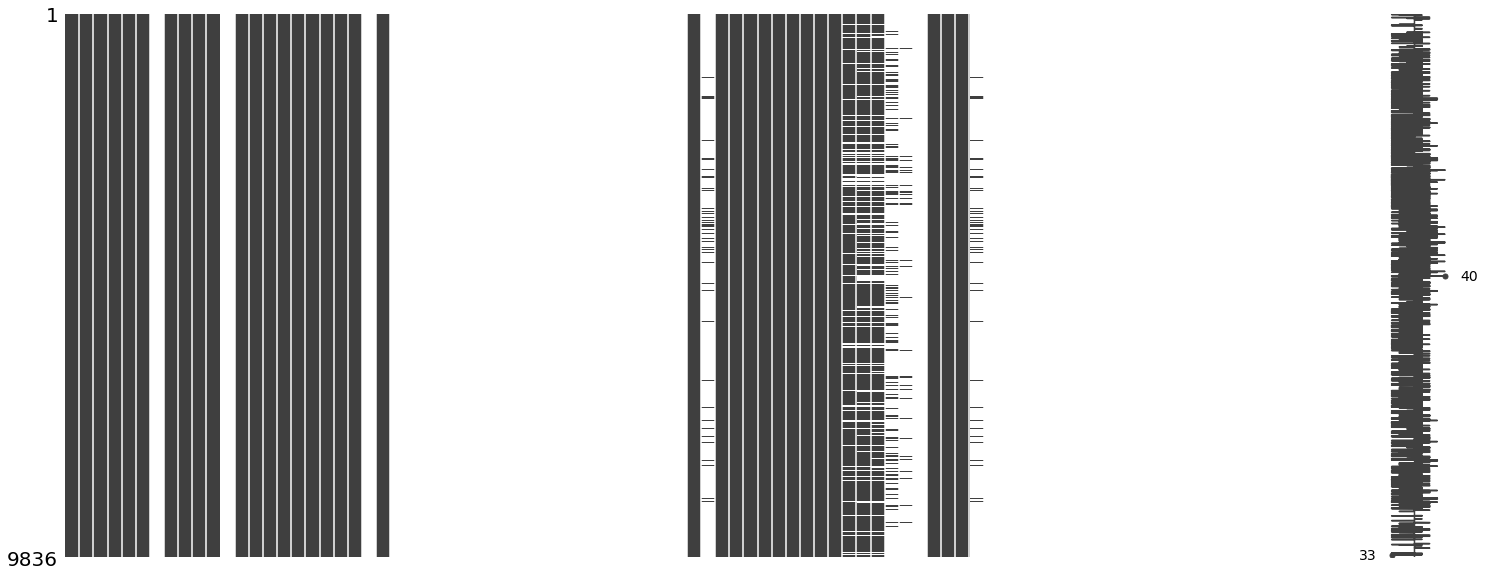

In [13]:
msno.matrix(df[df['error_type'] == 'Windows'])

<AxesSubplot:>

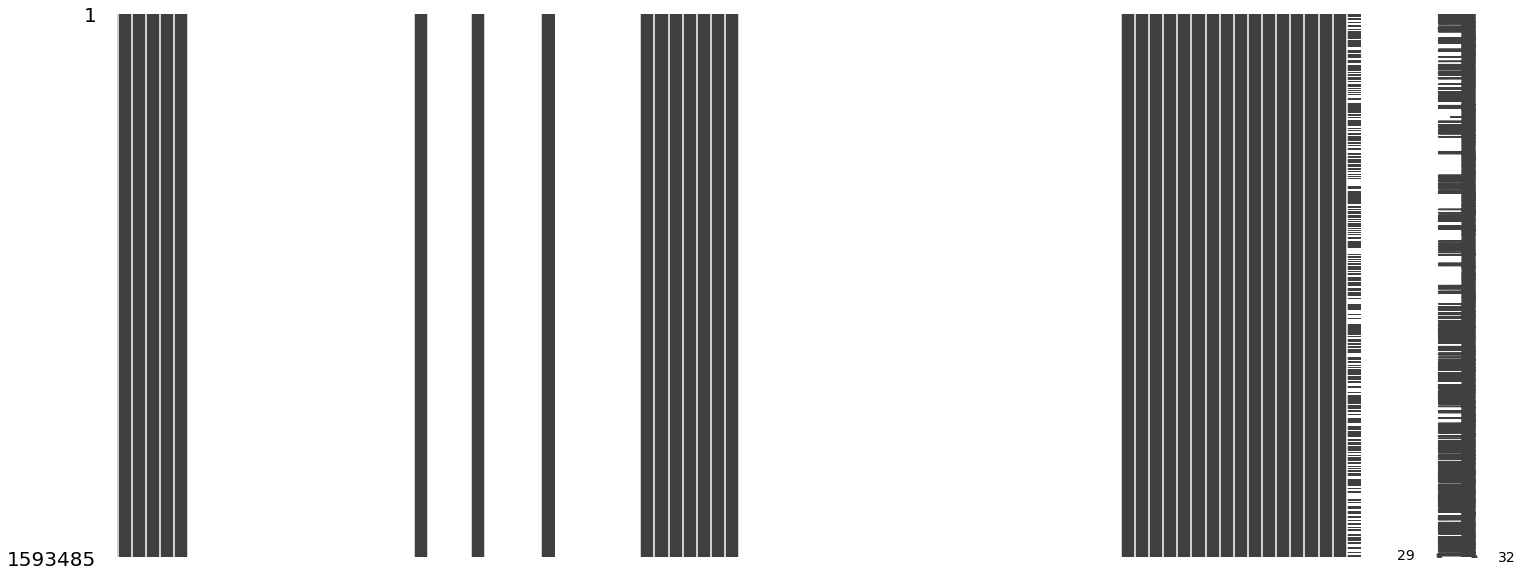

In [14]:
msno.matrix(df[df['error_type'] == 'Boot'])

In [15]:
df.iloc[:, :23]

,RWB_EVENTRAWRESULTITEM_ID,RWB_ETL_EVENT_DESTINATION_IDENTIFIER,RWB_CREATE_TIMESTAMP,RWB_EFFECTIVE_DATE,ID,ClientItemKey,LogName,ProviderName,ProviderGUID,EventID,...,Task,Opcode,Keywords,TimeCreatedSystemTime,EventRecordID,ActivityID,RelatedActivityID,Channel,UserSID,SchemaVersion
4740,4949237.0,5671,2023-04-12 08:46:15 -05:00,2023-04-12,72057594084844452,16803375,None,Application Error,{00000000-0000-0000-0000-00000000000,1000.0,...,100.0,0.0,3.602880e+16,2023-04-10 14:27:47.370,248362.0,{00000000-0000-0000-0000-00000000000,{00000000-0000-0000-0000-00000000000,Application,None,1.0
4741,4949238.0,5671,2023-04-12 08:46:15 -05:00,2023-04-12,72057594084844453,16803375,None,Application Error,{00000000-0000-0000-0000-00000000000,1000.0,...,100.0,0.0,3.602880e+16,2023-04-11 12:41:53.913,248800.0,{00000000-0000-0000-0000-00000000000,{00000000-0000-0000-0000-00000000000,Application,None,1.0
4742,4949259.0,5671,2023-04-12 08:46:15 -05:00,2023-04-12,72057594084844474,16815020,None,Application Error,{00000000-0000-0000-0000-00000000000,1000.0,...,100.0,0.0,3.602880e+16,2023-04-10 19:09:04.523,61242.0,{00000000-0000-0000-0000-00000000000,{00000000-0000-0000-0000-00000000000,Application,None,1.0
4743,4949282.0,5671,2023-04-12 08:46:15 -05:00,2023-04-12,72057594084844497,16790376,None,Application Error,{00000000-0000-0000-0000-00000000000,1000.0,...,100.0,0.0,3.602880e+16,2023-04-10 12:58:45.063,6262527.0,{00000000-0000-0000-0000-00000000000,{00000000-0000-0000-0000-00000000000,Application,None,1.0
4744,4949283.0,5671,2023-04-12 08:46:15 -05:00,2023-04-12,72057594084844498,16790376,None,Application Error,{00000000-0000-0000-0000-00000000000,1000.0,...,100.0,0.0,3.602880e+16,2023-04-10 12:58:54.250,6262529.0,{00000000-0000-0000-0000-00000000000,{00000000-0000-0000-0000-00000000000,Application,None,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4353,NaN,11835,2023-07-18 08:35:28 -05:00,2023-07-18,72057594043916547,16813869,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,1.0
4354,NaN,11835,2023-07-18 08:35:28 -05:00,2023-07-18,72057594043916548,16808648,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,1.0
4355,NaN,11835,2023-07-18 08:35:28 -05:00,2023-07-18,72057594043916549,16808648,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,1.0
4356,NaN,11835,2023-07-18 08:35:28 -05:00,2023-07-18,72057594043916551,16818802,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,1.0


In [16]:
common_columns = reduce(np.intersect1d, (df_app.columns, df_boot.columns, df_hang.columns, df_win.columns))
common_columns

array(['ClientItemKey', 'ID', 'RWB_CREATE_TIMESTAMP',
       'RWB_EFFECTIVE_DATE', 'RWB_ETL_EVENT_DESTINATION_IDENTIFIER',
       'SchemaVersion', 'error_type'], dtype=object)


# Join in ServiceNow INC data.


In [0]:
machines = pd.read_excel('../do_not_commit/Datasets/Persist_System_DISC.xlsx', )

In [29]:
incs = pd.read_csv('../do_not_commit/Datasets/ServiceNow_Incident.csv', low_memory=False)

In [21]:
incs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8263 entries, 0 to 8262
Columns: 120 entries, parent to configuration_item
dtypes: bool(11), float64(37), int64(14), object(58)
memory usage: 7.0+ MB


In [32]:
machines

,RWB_System_DISC_ID,RWB_ETL_EVENT_DESTINATION_IDENTIFIER,RWB_CREATE_TIMESTAMP,RWB_EFFECTIVE_DATE,ItemKey,DiscArchKey,SMS_Unique_Identifier0,Netbios_Name0,Name0,Operating_System_Name_and0,...,AADDeviceID,AADTenantID,BuildExt,DNSForestGUID,ESUValue,SenseID,DoNotConnectToWULocations,DisableWindowsUpdateAccess,OSIsSupported,DotNetRelease
0,1657127,4681,2023-03-27 09:10:26 -05:00,2023-03-27,16806520,5,GUID:146057A8-2AD3-497F-879B-09015232B7F3,MHN-D-U28265,MHN-D-U28265,20,...,65585F8C-B0DC-4FE4-8528-5843B1016E8F,B3CE298E-FE66-4A55-8590-71FA0A3E469C,10.0.19044.2728,72C4D827-A7FD-4AC7-847C-756740C26956,00000000-0000-0000-0000-000000000000,NaN,NaN,NaN,1.0,NaN
1,1659201,4681,2023-03-27 09:10:26 -05:00,2023-03-27,16812740,5,GUID:75C89C70-265C-4304-9110-BABE70B50A59,SFS-L-U33734,SFS-L-U33734,20,...,46DA3241-CF16-4C6E-BDE9-D0CAC4CEE8EF,B3CE298E-FE66-4A55-8590-71FA0A3E469C,10.0.19044.2728,72C4D827-A7FD-4AC7-847C-756740C26956,00000000-0000-0000-0000-000000000000,NaN,NaN,NaN,1.0,NaN
2,1656092,4681,2023-03-27 09:10:26 -05:00,2023-03-27,16801881,5,GUID:ED73D44E-5EB2-473F-83D9-306C39AA95D2,MIL-D-U26223,MIL-D-U26223,20,...,E62738A1-46CF-4B82-ADF2-EAAFE4407602,B3CE298E-FE66-4A55-8590-71FA0A3E469C,10.0.19044.2728,72C4D827-A7FD-4AC7-847C-756740C26956,00000000-0000-0000-0000-000000000000,NaN,NaN,NaN,1.0,NaN
3,1668089,4743,2023-03-28 09:10:26 -05:00,2023-03-28,16814743,5,GUID:A29B9E89-A56A-4960-9CE5-5798FCC9ECAE,MIL-L-U32024,MIL-L-U32024,20,...,2EC723C5-B1AD-4A32-9884-73B0FC0864BB,B3CE298E-FE66-4A55-8590-71FA0A3E469C,10.0.19044.2728,72C4D827-A7FD-4AC7-847C-756740C26956,00000000-0000-0000-0000-000000000000,NaN,NaN,NaN,1.0,NaN
4,1660216,4681,2023-03-27 09:10:26 -05:00,2023-03-27,16814624,5,GUID:8AFFB5D8-0012-47EA-AAA3-FDC8CB5B2FFA,MIL-L-U33543,MIL-L-U33543,20,...,CA4116EC-4A05-4F08-96ED-367B270E6651,B3CE298E-FE66-4A55-8590-71FA0A3E469C,10.0.19044.2728,72C4D827-A7FD-4AC7-847C-756740C26956,00000000-0000-0000-0000-000000000000,NaN,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1664037,4743,2023-03-28 09:10:26 -05:00,2023-03-28,16802766,5,GUID:3AB6EB67-916C-4AD8-8A9A-4BC7D1B7C28D,TIB-L-U20688,TIB-L-U20688,20,...,24316D39-BE3A-41D9-AA74-92CEA234965C,B3CE298E-FE66-4A55-8590-71FA0A3E469C,10.0.19044.2728,72C4D827-A7FD-4AC7-847C-756740C26956,00000000-0000-0000-0000-000000000000,NaN,NaN,NaN,1.0,NaN
1048571,1661225,4681,2023-03-27 09:10:26 -05:00,2023-03-27,16816458,5,GUID:06B10CA1-053E-4872-9CC5-1ECED10E64BA,CHI-D-U13876,CHI-D-U13876,20,...,898E45AB-275A-47B6-8C75-74A44F5050B5,B3CE298E-FE66-4A55-8590-71FA0A3E469C,10.0.19044.2728,72C4D827-A7FD-4AC7-847C-756740C26956,00000000-0000-0000-0000-000000000000,NaN,NaN,NaN,1.0,NaN
1048572,1667112,4743,2023-03-28 09:10:26 -05:00,2023-03-28,16813059,5,GUID:545B2F6F-E6A3-453E-88C3-1A2A3490B502,ENDPOINTGIAVUHR,ENDPOINTGIAVUHR,20,...,6C54C6AA-1916-4D27-82DF-BDEF6B4AE616,B3CE298E-FE66-4A55-8590-71FA0A3E469C,10.0.19044.2486,72C4D827-A7FD-4AC7-847C-756740C26956,00000000-0000-0000-0000-000000000000,NaN,NaN,NaN,1.0,NaN
1048573,1666122,4743,2023-03-28 09:10:26 -05:00,2023-03-28,16810453,5,GUID:EFCE0357-ECFF-4F96-8CC6-96BF73E9EA12,CHI-L-U32364,CHI-L-U32364,20,...,77876ABB-5000-4E07-BCCE-D72C69975B31,B3CE298E-FE66-4A55-8590-71FA0A3E469C,10.0.19044.2728,72C4D827-A7FD-4AC7-847C-756740C26956,00000000-0000-0000-0000-000000000000,NaN,NaN,NaN,1.0,NaN


In [39]:
machines['ClientItemKey'] = machines['ItemKey'].copy()

In [42]:
machines_merged = df.merge(machines[['RWB_EFFECTIVE_DATE', 'ClientItemKey', 'Name0']], on=['RWB_EFFECTIVE_DATE', 'ClientItemKey'])

In [44]:
incs

,parent,x_splu2_victorops_victorops_initiated,caused_by,watch_list,u_browser_type,u_swap,upon_reject,sys_updated_on,origin_table,approval_history,...,u_scivantave_ticket_number,sys_tags,u_yodlee_sr_1,u_interaction,location,category,is_phone,is_server,short_description_NER,configuration_item
0,NaN,False,NaN,NaN,NaN,False,cancel,1/6/2023 21:00,NaN,NaN,...,NaN,NaN,NaN,NaN,{'link': 'https://rwbaird.service-now.com/api/...,active_directory,0,0,Lost shared drive,NaN
1,NaN,False,NaN,NaN,NaN,False,cancel,1/7/2023 16:00,NaN,NaN,...,NaN,NaN,NaN,NaN,{'link': 'https://rwbaird.service-now.com/api/...,laptop,0,0,T1 not connecting,NaN
2,NaN,False,NaN,NaN,NaN,False,cancel,1/7/2023 17:00,NaN,NaN,...,NaN,NaN,NaN,NaN,{'link': 'https://rwbaird.service-now.com/api/...,laptop,0,0,Changing PW while working remote.,NaN
3,NaN,False,NaN,NaN,NaN,False,cancel,1/8/2023 14:00,NaN,NaN,...,NaN,NaN,NaN,NaN,{'link': 'https://rwbaird.service-now.com/api/...,bloomberg,0,0,Bloomberg Automatic Update not progressing,STM-D-U27117
4,NaN,False,NaN,NaN,NaN,False,cancel,1/8/2023 14:00,NaN,NaN,...,NaN,NaN,NaN,NaN,{'link': 'https://rwbaird.service-now.com/api/...,laptop,0,0,Laptop( Personal) Connectivity,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8258,NaN,False,NaN,NaN,NaN,False,cancel,7/10/2023 20:50,NaN,NaN,...,NaN,NaN,NaN,{'link': 'https://rwbaird.service-now.com/api/...,{'link': 'https://rwbaird.service-now.com/api/...,Software,0,0,New computer missing some app,NaN
8259,NaN,False,NaN,NaN,NaN,False,cancel,7/10/2023 21:16,NaN,NaN,...,NaN,NaN,NaN,{'link': 'https://rwbaird.service-now.com/api/...,{'link': 'https://rwbaird.service-now.com/api/...,active_directory,0,0,User Needed Mapped Drive,MIL-L-U32601
8260,NaN,False,NaN,NaN,NaN,False,cancel,7/10/2023 21:34,NaN,NaN,...,NaN,NaN,NaN,{'link': 'https://rwbaird.service-now.com/api/...,{'link': 'https://rwbaird.service-now.com/api/...,Software,0,0,Repo Application Suite incorrect file path,NaN
8261,NaN,False,NaN,NaN,NaN,False,cancel,7/10/2023 22:23,NaN,NaN,...,NaN,NaN,NaN,NaN,{'link': 'https://rwbaird.service-now.com/api/...,Microsoft Outlook 365,0,0,Can not access email on iPhone,NaN


In [46]:
incs_merged = machines_merged.merge(incs, left_on='Name0', right_on='configuration_item')
incs_merged

,RWB_EVENTRAWRESULTITEM_ID,RWB_ETL_EVENT_DESTINATION_IDENTIFIER,RWB_CREATE_TIMESTAMP,RWB_EFFECTIVE_DATE,ID,ClientItemKey,LogName,ProviderName,ProviderGUID,EventID,...,u_scivantave_ticket_number,sys_tags,u_yodlee_sr_1,u_interaction,location,category,is_phone,is_server,short_description_NER,configuration_item
0,4949348.0,5671,2023-04-12 08:46:15 -05:00,2023-04-12,72057594084844563,16816812,None,Application Error,{00000000-0000-0000-0000-00000000000,1000.0,...,NaN,NaN,NaN,NaN,{'link': 'https://rwbaird.service-now.com/api/...,Microsoft Outlook 365,0,0,Teams Calendar Add- In Missing in Outlook on N...,MIL-L-U32072
1,4949348.0,5671,2023-04-12 08:46:15 -05:00,2023-04-12,72057594084844563,16816812,None,Application Error,{00000000-0000-0000-0000-00000000000,1000.0,...,NaN,NaN,NaN,NaN,{'link': 'https://rwbaird.service-now.com/api/...,Microsoft Excel 365,0,0,my excel sometimes wo n't allow me to save doc...,MIL-L-U32072
2,4949348.0,5671,2023-04-12 08:46:15 -05:00,2023-04-12,72057594084844563,16816812,None,Application Error,{00000000-0000-0000-0000-00000000000,1000.0,...,NaN,NaN,NaN,{'link': 'https://rwbaird.service-now.com/api/...,{'link': 'https://rwbaird.service-now.com/api/...,Microsoft Teams,0,0,Teams Fails to Connect,MIL-L-U32072
3,4949349.0,5671,2023-04-12 08:46:15 -05:00,2023-04-12,72057594084844564,16816812,None,Application Error,{00000000-0000-0000-0000-00000000000,1000.0,...,NaN,NaN,NaN,NaN,{'link': 'https://rwbaird.service-now.com/api/...,Microsoft Outlook 365,0,0,Teams Calendar Add- In Missing in Outlook on N...,MIL-L-U32072
4,4949349.0,5671,2023-04-12 08:46:15 -05:00,2023-04-12,72057594084844564,16816812,None,Application Error,{00000000-0000-0000-0000-00000000000,1000.0,...,NaN,NaN,NaN,NaN,{'link': 'https://rwbaird.service-now.com/api/...,Microsoft Excel 365,0,0,my excel sometimes wo n't allow me to save doc...,MIL-L-U32072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433896,NaN,8025,2023-05-20 08:35:27 -05:00,2023-05-20,72057594043641338,16818248,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,{'link': 'https://rwbaird.service-now.com/api/...,scansnap,0,0,Missing scansnap software for scanner to work,COL-L-U21796
433897,NaN,8025,2023-05-20 08:35:27 -05:00,2023-05-20,72057594043641339,16818248,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,{'link': 'https://rwbaird.service-now.com/api/...,scansnap,0,0,Missing scansnap software for scanner to work,COL-L-U21796
433898,NaN,8025,2023-05-20 08:35:27 -05:00,2023-05-20,72057594043641339,16818248,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,{'link': 'https://rwbaird.service-now.com/api/...,scansnap,0,0,Missing scansnap software for scanner to work,COL-L-U21796
433899,NaN,8025,2023-05-20 08:35:27 -05:00,2023-05-20,72057594043641340,16818248,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,{'link': 'https://rwbaird.service-now.com/api/...,scansnap,0,0,Missing scansnap software for scanner to work,COL-L-U21796


In [47]:
incs_merged[incs_merged['configuration_item'] == 'STM-D-U27117']

,RWB_EVENTRAWRESULTITEM_ID,RWB_ETL_EVENT_DESTINATION_IDENTIFIER,RWB_CREATE_TIMESTAMP,RWB_EFFECTIVE_DATE,ID,ClientItemKey,LogName,ProviderName,ProviderGUID,EventID,...,u_scivantave_ticket_number,sys_tags,u_yodlee_sr_1,u_interaction,location,category,is_phone,is_server,short_description_NER,configuration_item
154132,4703955.0,5299,2023-04-06 08:46:29 -05:00,2023-04-06,72057594084596704,16796227,None,Application Error,{00000000-0000-0000-0000-00000000000,1000.0,...,NaN,NaN,NaN,NaN,{'link': 'https://rwbaird.service-now.com/api/...,bloomberg,0,0,Bloomberg Automatic Update not progressing,STM-D-U27117
154133,4703955.0,5299,2023-04-06 08:46:29 -05:00,2023-04-06,72057594084596704,16796227,None,Application Error,{00000000-0000-0000-0000-00000000000,1000.0,...,NaN,NaN,NaN,NaN,{'link': 'https://rwbaird.service-now.com/api/...,bloomberg,0,0,Auto Update of Bloomberg sitting at <PERCENT> ...,STM-D-U27117
154134,NaN,5297,2023-04-06 08:35:25 -05:00,2023-04-06,72057594043418861,16796227,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,{'link': 'https://rwbaird.service-now.com/api/...,bloomberg,0,0,Bloomberg Automatic Update not progressing,STM-D-U27117
154135,NaN,5297,2023-04-06 08:35:25 -05:00,2023-04-06,72057594043418861,16796227,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,{'link': 'https://rwbaird.service-now.com/api/...,bloomberg,0,0,Auto Update of Bloomberg sitting at <PERCENT> ...,STM-D-U27117
154136,4645829.0,5237,2023-04-05 08:46:17 -05:00,2023-04-05,72057594084538000,16796227,None,Application Error,{00000000-0000-0000-0000-00000000000,1000.0,...,NaN,NaN,NaN,NaN,{'link': 'https://rwbaird.service-now.com/api/...,bloomberg,0,0,Bloomberg Automatic Update not progressing,STM-D-U27117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154605,NaN,7777,2023-05-16 08:35:25 -05:00,2023-05-16,72057594043620339,16796227,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,{'link': 'https://rwbaird.service-now.com/api/...,bloomberg,0,0,Auto Update of Bloomberg sitting at <PERCENT> ...,STM-D-U27117
154606,NaN,7963,2023-05-19 08:35:26 -05:00,2023-05-19,72057594043634938,16796227,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,{'link': 'https://rwbaird.service-now.com/api/...,bloomberg,0,0,Bloomberg Automatic Update not progressing,STM-D-U27117
154607,NaN,7963,2023-05-19 08:35:26 -05:00,2023-05-19,72057594043634938,16796227,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,{'link': 'https://rwbaird.service-now.com/api/...,bloomberg,0,0,Auto Update of Bloomberg sitting at <PERCENT> ...,STM-D-U27117
154608,NaN,8149,2023-05-21 08:35:27 -05:00,2023-05-21,72057594043645344,16796227,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,{'link': 'https://rwbaird.service-now.com/api/...,bloomberg,0,0,Bloomberg Automatic Update not progressing,STM-D-U27117


In [24]:
for col in incs.columns:
    print(col)

parent
x_splu2_victorops_victorops_initiated
caused_by
watch_list
u_browser_type
u_swap
upon_reject
sys_updated_on
origin_table
approval_history
skills
u_gl_code
number
u_moniker
state
knowledge
order
cmdb_ci
contract
impact
active
priority
sys_domain_path
u_asset_substatus
business_duration
group_list
approval_set
u_public_pc
needs_attention
universal_request
correlation_display
u_error_code
work_start
u_requestor
notify
service_offering
sys_class_name
closed_by
follow_up
parent_incident
u_hardware_swap
reassignment_count
u_end_of_lifecycle
assigned_to
u_point_of_contact_proofpoint
sla_due
comments_and_work_notes
u_actual_resolution_time
u_affect_asset
u_replacement_asset
u_cause_code
escalation
upon_approval
correlation_id
u_location
made_sla
u_browsing_data_cleared
u_paging_response
child_incidents
task_effective_number
resolved_by
sys_updated_by
opened_by
sys_created_on
sys_domain
route_reason
calendar_stc
closed_at
u_error_code_account_alerts
u_windows_version
business_service
x_s